# Mini Project 3: Bank Fraud Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import datasets

X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=2)

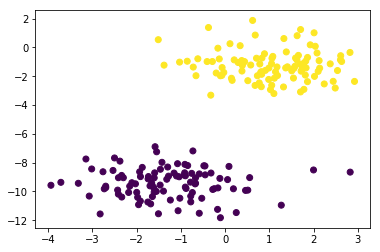

In [39]:
plt.scatter(X[:,0],X[:,1], c = Y)

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel = 'linear', C = 1.0).fit(X, Y)


#### 2. In problem 1, we use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Bank Fraud Detection Case where you will classify two multiple-feature groups.

**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You must predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.


**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
( You can google “Component Analysis with KMeans visuals – Kaggle” and learn how to do this step from Kaggle website)
4.	You don’t need to do PCA right now. 
5.	Choose the proper method to train the model:
binary classification Models: Logistic regression, Support vector machine, Naive Bayes, k-nearest neighbors, neural network, Decision tree…

6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.


In [8]:
#Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [34]:
Y_train = train['Y']
X_train = train.drop(['Y'],axis = 1)

In [35]:
X_train

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
2,3,350000,2,1,2,41,0,0,0,0,...,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000
3,4,240000,2,2,1,43,1,-2,-2,-1,...,0,12700,12500,26225,0,0,12700,0,13725,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,832,332,416,416,0,416,332,500,3500,832
5,6,210000,2,1,2,29,-1,-1,-1,-1,...,871,871,2042,1021,27371,871,871,2042,0,1666
6,7,250000,1,1,1,48,0,-1,-1,-1,...,4898,19351,4858,6973,10021,5033,19619,4874,7050,12073
7,8,110000,1,3,1,54,0,0,0,0,...,82407,70562,70982,71609,4500,3786,2666,2900,3100,2856
8,9,60000,1,2,2,30,0,0,0,0,...,42627,43914,45053,46303,3000,2000,2000,2000,2000,2000
9,10,500000,1,1,1,53,-2,-2,-2,-2,...,15734,-101,27145,1479,13941,16392,470,27916,1994,12670
10,11,30000,1,2,2,35,1,3,3,2,...,26185,25470,25751,27179,2000,0,0,1000,2000,1000
11,12,220000,1,1,2,31,-2,-2,-2,-2,...,5227,2291,4739,1640,3796,5227,2293,4739,1640,3012


In [ ]:
#discern the categorical and continuous variables


In [6]:
#replace the NA’s with the predicted class labels
sample_sub = pd.read_csv('sampleSubmission.csv')